# Testing by X

In [1]:
%matplotlib inline

from importlib import reload
import os
import numpy as np

import pandas

import h5py
import seaborn as sns
import pandas as pd
import umap
from ulmo import io as ulmo_io
from ulmo import plotting

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from tqdm import trange

# Load up the SSL latents

In [2]:
### Load train latents from s3
latents_last_file = 's3://modis-l2/modis_latents_simclr/MODIS_2010_train_last.h5'
latents_last = ulmo_io.load_to_bytes(latents_last_file)
#
with h5py.File(latents_last, 'r') as file:
    print(file.keys())
    latents_last = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [3]:
latents_last.shape

(135712, 128)

# Ulmo

## No regularization

In [4]:
%%time
reducer_umap = umap.UMAP()
latents_embedding = reducer_umap.fit_transform(latents_last)

CPU times: user 1h 15min 22s, sys: 25min 29s, total: 1h 40min 52s
Wall time: 6min 40s


In [5]:
latents_embedding.shape

(135712, 2)

In [6]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_last)

CPU times: user 59min 53s, sys: 19min 40s, total: 1h 19min 33s
Wall time: 5min 15s


### Plot

<AxesSubplot:>

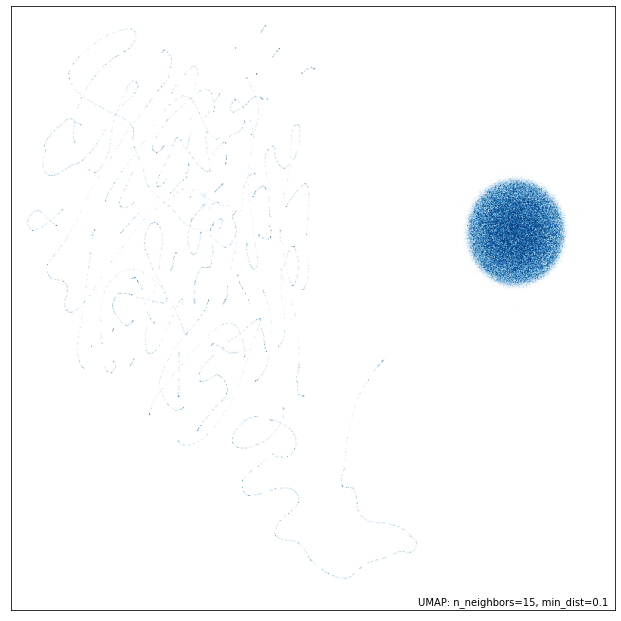

In [9]:
import umap.plot
umap.plot.points(latents_mapping)

## Regularize

In [10]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_last)
### Transform the latents
latents_std = scaler.transform(latents_last)

In [12]:
%%time
reducer_umap = umap.UMAP()
latents_embedding2 = reducer_umap.fit_transform(latents_std)

CPU times: user 1h 3min 44s, sys: 19min 32s, total: 1h 23min 16s
Wall time: 5min 29s


In [13]:
%%time
reducer_umap = umap.UMAP()
latents_mapping2 = reducer_umap.fit(latents_std)

CPU times: user 1h 10min 58s, sys: 25min 6s, total: 1h 36min 5s
Wall time: 6min 1s


<AxesSubplot:>

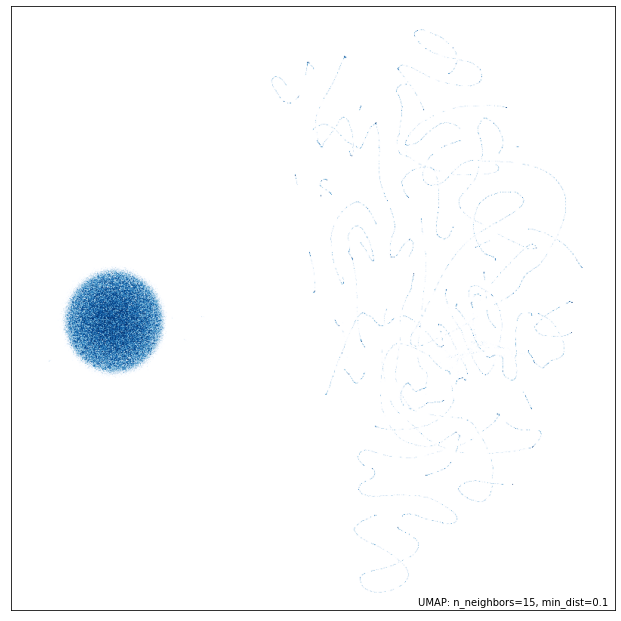

In [14]:
umap.plot.points(latents_mapping2)

----

# Test

In [15]:
latents_last_file = 's3://modis-l2/modis_latents_simclr/modis_latents_last.h5'
latents_last = ulmo_io.load_to_bytes(latents_last_file)
#
with h5py.File(latents_last, 'r') as file:
    print(file.keys())
    latents_last = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [16]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_last)
### Transform the latents
latents_std = scaler.transform(latents_last)

In [17]:
%%time
reducer_umap = umap.UMAP()
latents_embedding2 = reducer_umap.fit_transform(latents_std)

CPU times: user 14min 38s, sys: 2min 8s, total: 16min 46s
Wall time: 1min 52s


In [18]:
%%time
reducer_umap = umap.UMAP()
latents_mapping2 = reducer_umap.fit(latents_std)

CPU times: user 12min 20s, sys: 2min 13s, total: 14min 34s
Wall time: 1min 54s


<AxesSubplot:>

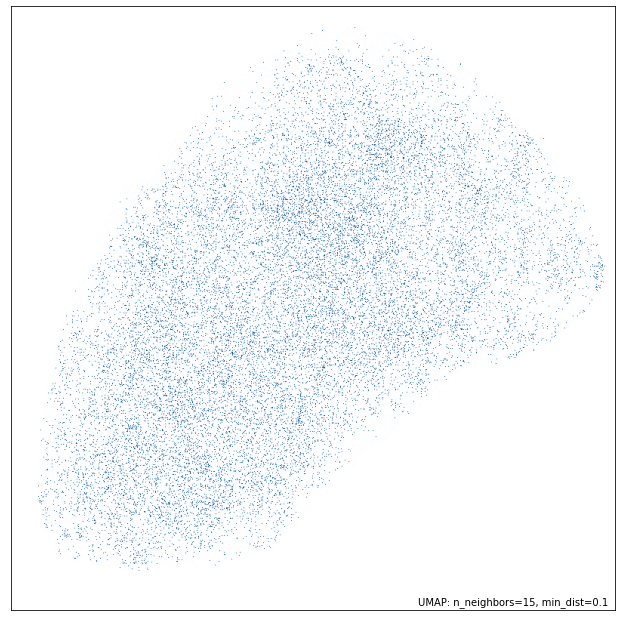

In [19]:
umap.plot.points(latents_mapping2)

In [20]:
%%time
reducer_umap = umap.UMAP()
latents_embedding3 = reducer_umap.fit_transform(latents_last)

CPU times: user 14min 46s, sys: 2min 9s, total: 16min 55s
Wall time: 1min 57s


In [21]:
%%time
reducer_umap = umap.UMAP()
latents_mapping3 = reducer_umap.fit(latents_last)

CPU times: user 13min 14s, sys: 2min, total: 15min 15s
Wall time: 1min 47s


<AxesSubplot:>

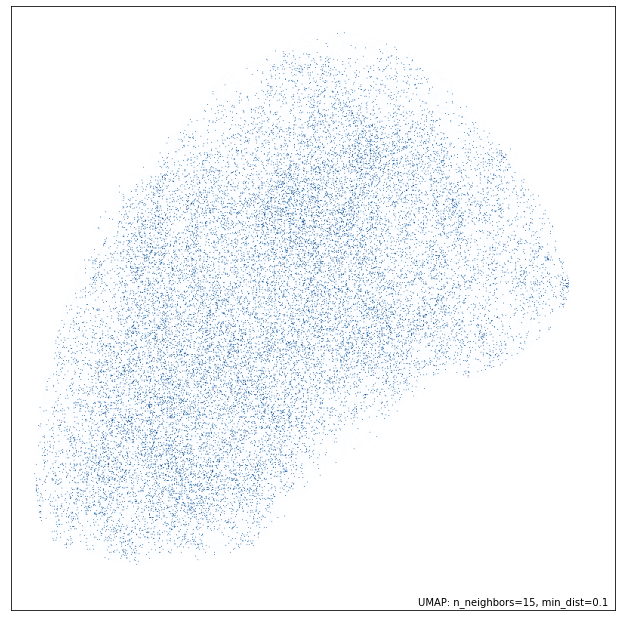

In [22]:
umap.plot.points(latents_mapping3)

----

# Comparing originals

## Erdong's

In [3]:
latents_last_file = 's3://modis-l2/modis_latents_simclr/modis_latents_last.h5'
latents_last = ulmo_io.load_to_bytes(latents_last_file)
#
with h5py.File(latents_last, 'r') as file:
    print(file.keys())
    latents_last = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


## Mine

In [7]:
my_orig_file = 's3://modis-l2/modis_latents_simclr/MODIS_orig_2010_train_last.h5'

In [8]:
latents_mine = ulmo_io.load_to_bytes(my_orig_file)
#
with h5py.File(latents_mine, 'r') as file:
    #print(file.keys())
    latents_mine = file['modis_latents'][:]

## Test

In [9]:
latents_last[0,:] - latents_mine[0,:]

array([-0.00105257, -0.06177365,  0.02333897,  0.05875481,  0.01694185,
       -0.00194306,  0.02446661,  0.04061243,  0.02464694, -0.11207051,
        0.03562529,  0.23334263,  0.0739252 ,  0.14564474, -0.09883755,
       -0.01244628, -0.09143987,  0.11838783, -0.25236827,  0.11037388,
        0.07979134,  0.21131249, -0.20098461, -0.2364892 ,  0.03195835,
       -0.04339848,  0.05101894, -0.1368697 ,  0.01488653, -0.2986244 ,
       -0.00542402,  0.09710205, -0.02991413, -0.07805965,  0.07757199,
        0.00156218, -0.09732081,  0.21347383, -0.07724586, -0.03751778,
        0.11285279,  0.37476546,  0.11896937, -0.00438425, -0.05728769,
        0.04825672,  0.01616357, -0.13115561, -0.02367653, -0.11729348,
       -0.19191822,  0.03863503, -0.06538797, -0.0534074 ,  0.05474618,
        0.02571219, -0.09053737, -0.08282354, -0.07845353, -0.00918125,
       -0.13219628,  0.08612679,  0.17026544,  0.15054172,  0.21731457,
       -0.10457972,  0.05036298, -0.02025898, -0.19367155,  0.14